In [1]:
import time
start_time=time.time()

Abstract

Se presenta un ajuste polinomial (0-6 ord) a los datos observacionales para investigar movimientos a gran escala (detrended data) en direciones X y Y.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import os

import itertools
from scipy.interpolate import interp1d
from scipy import interpolate

from astropy.io import fits

from downsample import downsample

from SABReXX import sosf,acf,psk,ps,sosfnorm,sosfw,sosfw2,sosfs,sosfnorms,sfwh,pst
from CorrPoldef import CPV,CPH
from LRdefX import LR,ACLR
from Pltdef import pltdata

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

Input Data

In [3]:
n=7

datap='595.TAURUS.Ha.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
#os.remove(datap)
dt.describe()

,Y,X,RV,I,Sig
count,814.000000,814.000000,814.000000,814.000000,814.000000
mean,45.855037,65.545455,2.874367,3.437816,24.728415
std,12.009677,11.181485,5.143642,1.409502,3.115149
min,27.000000,36.000000,-11.740000,1.780000,17.605000
25%,36.000000,57.000000,-0.408750,2.296875,22.613750
50%,43.000000,68.000000,1.963750,3.101250,24.151250
75%,56.000000,73.000000,5.273125,4.269375,26.180625
max,72.000000,99.000000,19.887500,8.965000,37.025000


In [4]:
wd=dt.X.max()-dt.X.min()
hd=dt.Y.max()-dt.Y.min()
ar=wd/hd
sz=4

Statistical Data

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


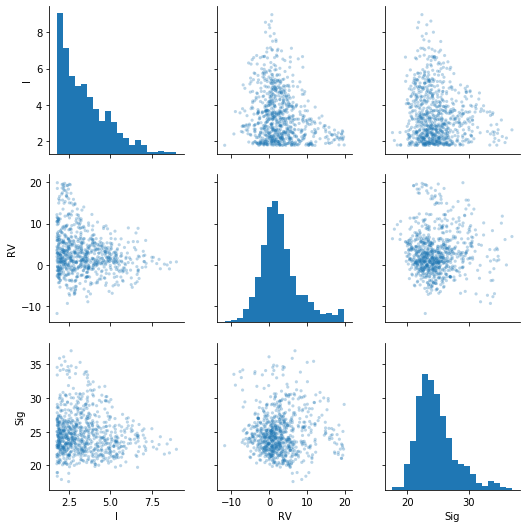

In [5]:
sns.pairplot(dt, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


Emission Map

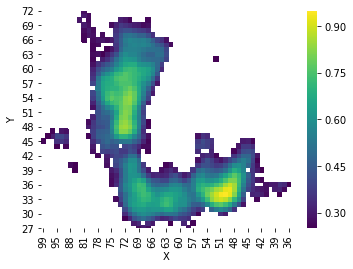

In [6]:
datal=dt.copy()
datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
#datal.Y=datal.Y.astype(int)

dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataH_f, cmap="viridis",xticklabels='auto')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="16"

Radial Velocity

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


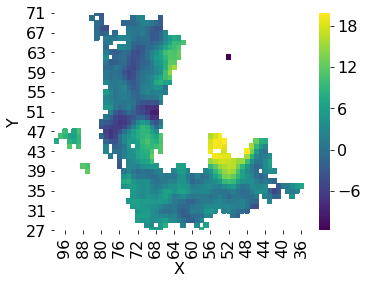

In [7]:
datal=dt.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

Weighted property

In [8]:
W=np.log(abs((dt.RV*dt.I)/dt.I.sum()))
W.head()

0   -5.211138
1   -5.521452
2   -5.564289
3   -5.425537
4   -5.565655
dtype: float64

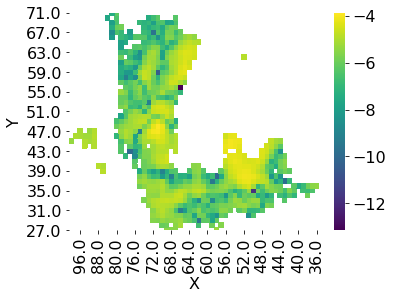

In [9]:
dtW=[dt.X,dt.Y,W]
dtW=pd.DataFrame(dtW).T
dtW.columns=['X','Y','W']

dtH_W=(dtW.round(2)).pivot(index='Y', columns='X', values='W')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dtH_W, cmap="viridis")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

Horizontal Polynomial Correction

 
2.874
 
-0.1007 x + 9.474
           2
0.0009371 x - 0.2196 x + 13.13
           3         2
0.0006373 x - 0.127 x + 8.096 x - 161.1
           4            3           2
7.897e-06 x - 0.001472 x + 0.07877 x - 0.5905 x - 27.3
            5             4           3         2
-9.811e-07 x + 0.0003319 x - 0.04335 x + 2.727 x - 82.42 x + 960.8
           6             5             4          3         2
1.327e-09 x - 1.509e-06 x + 0.0004179 x - 0.0507 x + 3.073 x - 90.94 x + 1046


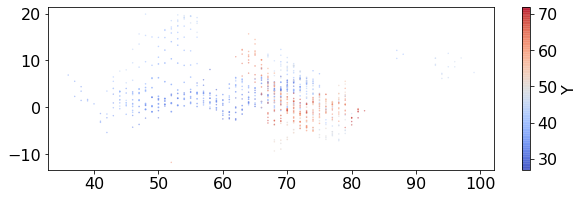

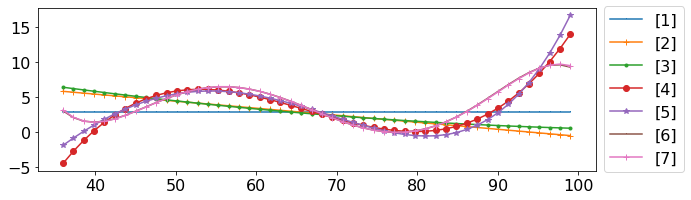

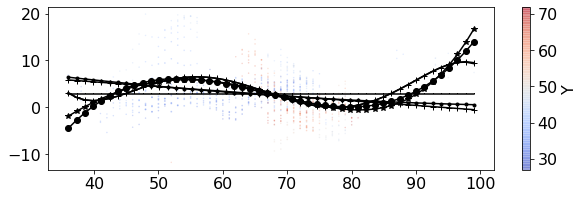

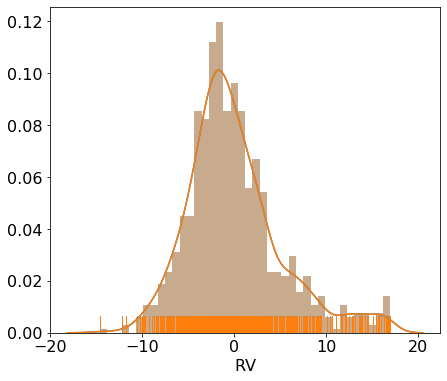

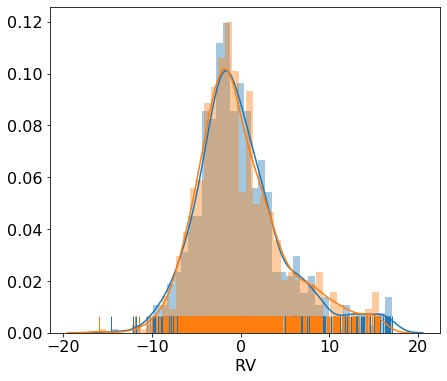

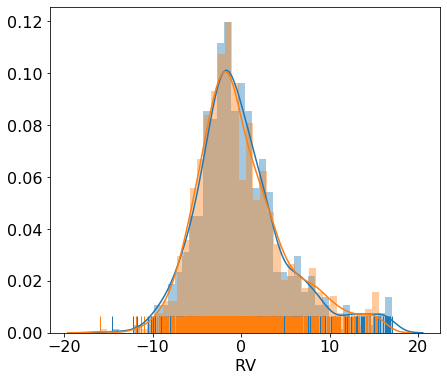

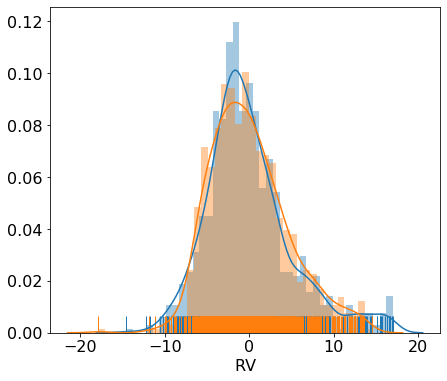

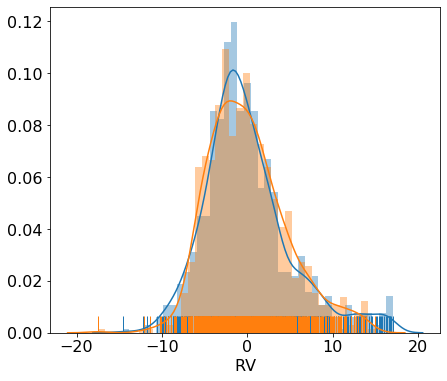

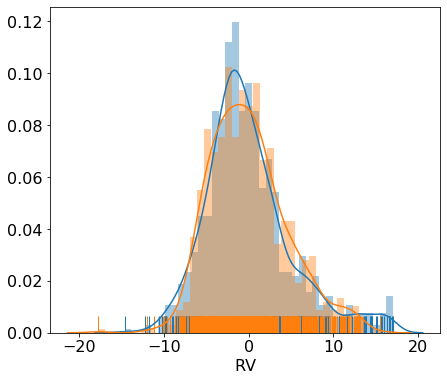

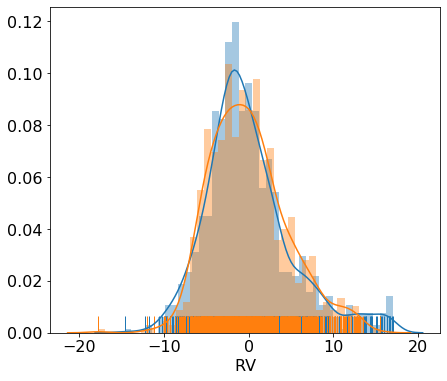

In [10]:
argo1=CPH(dt,n)

Vertical Polynomial Correction

 
2.874
 
-0.08 x + 6.543
           2
-0.007046 x + 0.6028 x - 8.939
           3           2
0.0005462 x - 0.08648 x + 4.313 x - 64.52
            4             3          2
-9.865e-07 x + 0.0007384 x - 0.1001 x + 4.732 x - 69.2
            5            4          3         2
-8.943e-06 x + 0.002179 x - 0.2073 x + 9.598 x - 216 x + 1892
          6             5           4          3         2
3.49e-07 x - 0.0001114 x + 0.01449 x - 0.9811 x + 36.43 x - 702.4 x + 5491


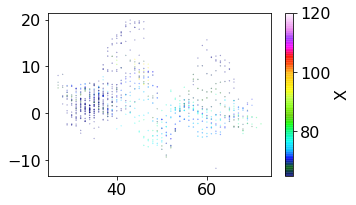

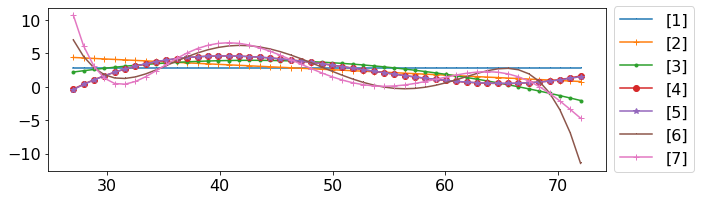

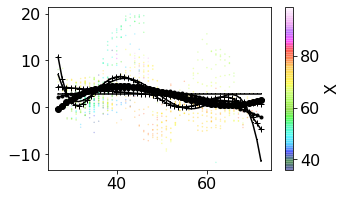

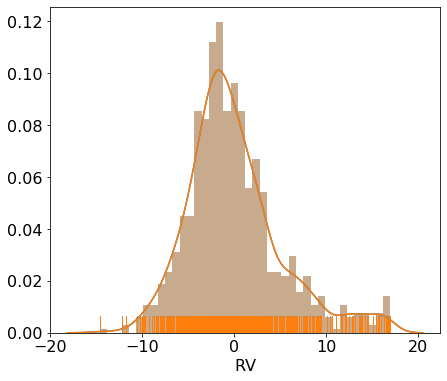

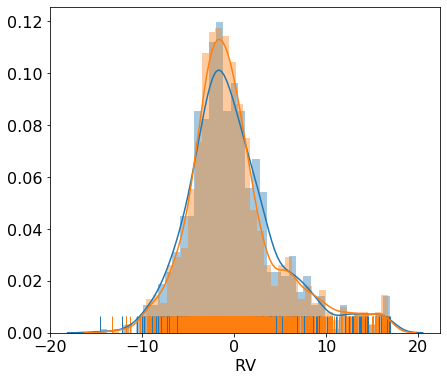

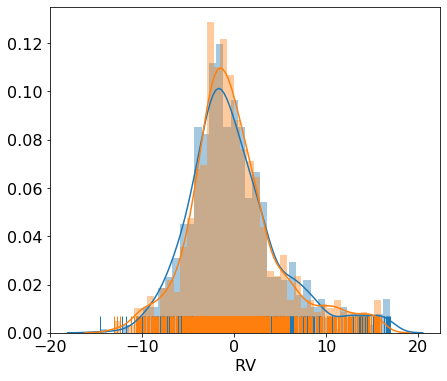

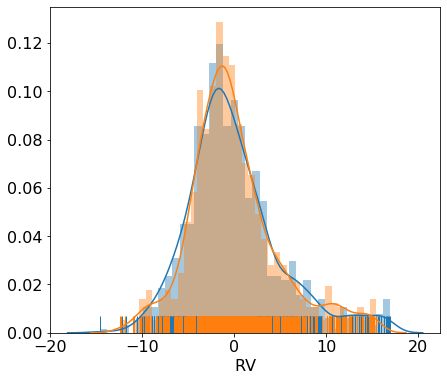

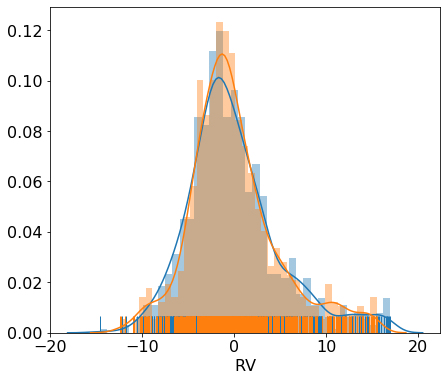

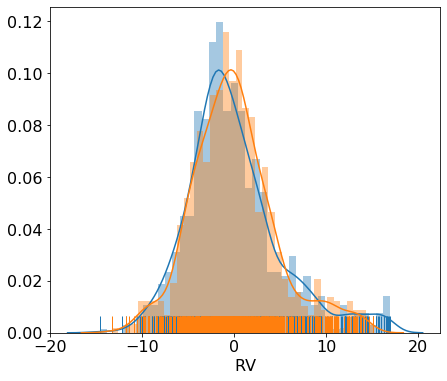

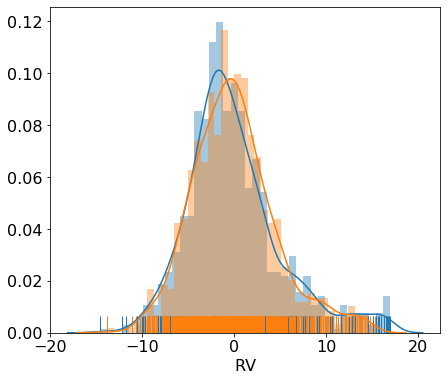

In [11]:
argo2=CPV(dt,n)

Structure Function

In [12]:
SF1=dict()

for i in range(n):
    SF1[i]=sosf(argo1[i])
    
SF2=dict()

for i in range(n):
    SF2[i]=sosf(argo2[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [13]:
xi=1
xf=20

SF1Data=dict()
SF1Pr=dict()

for i in range(n):
    SF1Data[i],SF1Pr[i]=LR(SF1[i]['Lag'],SF1[i]['Nmqvd'],SF1[i]['ErrY'],xi,xf,n)
    
SF2Data=dict()
SF2Pr=dict()


for i in range(n):
    SF2Data,SF2Pr[i]=LR(SF2[i]['Lag'],SF2[i]['Nmqvd'],SF2[i]['ErrY'],xi,xf,n)

In [14]:
SF1Data,SF2Data

({0:               R       eps     alpha  lags
  Value  0.918549  7.796797  0.769768   2.0
  Err    0.000380  0.064276  0.001554  20.0,
  1:               R       eps     alpha  lags
  Value  0.896405  8.174351  0.734645   2.0
  Err    0.000331  0.068445  0.001619  20.0,
  2:               R       eps     alpha  lags
  Value  0.894158  8.202179  0.735052   2.0
  Err    0.000320  0.068857  0.001629  20.0,
  3:               R       eps     alpha  lags
  Value  0.857739  8.590831  0.679497   2.0
  Err    0.000208  0.071665  0.001706  20.0,
  4:               R       eps     alpha  lags
  Value  0.858715  8.598166  0.678788   2.0
  Err    0.000251  0.071268  0.001664  20.0,
  5:               R       eps     alpha  lags
  Value  0.868719  8.279521  0.696349   2.0
  Err    0.000222  0.069774  0.001754  20.0,
  6:               R       eps     alpha  lags
  Value  0.868959  8.273485  0.696629   2.0
  Err    0.000218  0.069658  0.001752  20.0},
               R       eps     alpha  lags
 Val

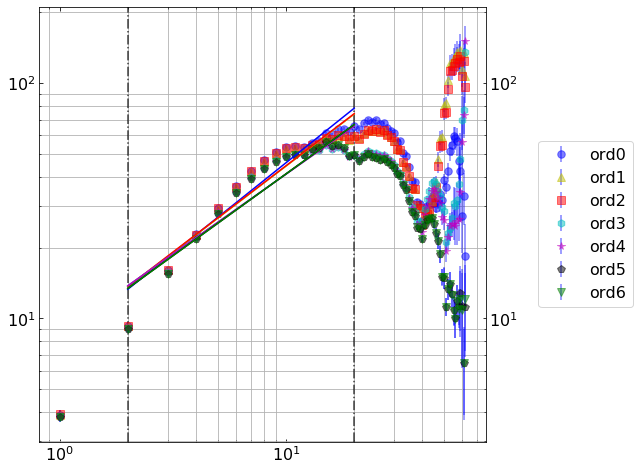

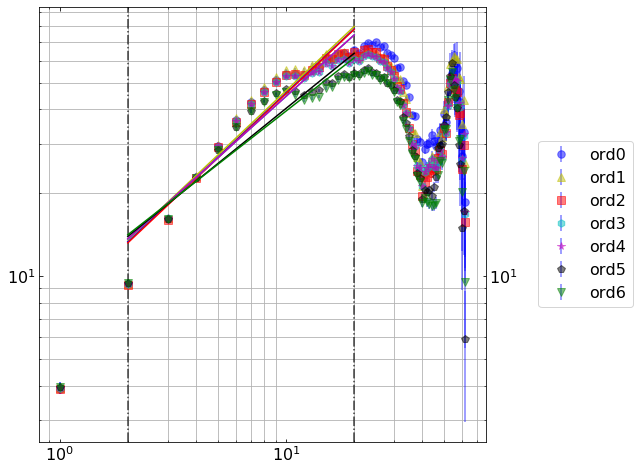

In [15]:
pltdata(SF1,SF1Pr,xi,xf,n)
pltdata(SF2,SF2Pr,xi,xf,n)

Structure Function Norm

In [16]:
SFn1=dict()

for i in range(n):
    SFn1[i]=sosfnorm(argo1[i])
    
SFn2=dict()

for i in range(n):
    SFn2[i]=sosfnorm(argo2[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:695: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:704: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [17]:
xi=1
xf=25

SFN1Data=dict()
SFN1Pr=dict()

for i in range(n):
    SFN1Data[i],SFN1Pr[i]=LR(SFn1[i]['Lag'],SFn1[i]['Nmqvd'],SFn1[i]['ErrY'],xi,xf,n)
    
SFN2Data=dict()
SFN2Pr=dict()

for i in range(n):
    SFN2Data[i],SFN2Pr[i]=LR(SFn2[i]['Lag'],SFn2[i]['Nmqvd'],SFn2[i]['ErrY'],xi,xf,n)

In [18]:
SFN1Data,SFN2Data

({0:               R       eps     alpha  lags
  Value  0.901432  0.339245  0.691081   2.0
  Err    0.000521  0.002561  0.001171  25.0,
  1:               R       eps    alpha  lags
  Value  0.868486  0.380698  0.64544   2.0
  Err    0.000426  0.003025  0.00136  25.0,
  2:               R       eps     alpha  lags
  Value  0.863618  0.384063  0.643307   2.0
  Err    0.000414  0.003043  0.001351  25.0,
  3:               R       eps     alpha  lags
  Value  0.783048  0.487747  0.561601   2.0
  Err    0.000269  0.003765  0.001352  25.0,
  4:               R       eps     alpha  lags
  Value  0.780988  0.491609  0.559860   2.0
  Err    0.000325  0.003733  0.001288  25.0,
  5:               R       eps     alpha  lags
  Value  0.767594  0.495851  0.561820   2.0
  Err    0.000247  0.003793  0.001338  25.0,
  6:               R       eps     alpha  lags
  Value  0.767744  0.495775  0.561837   2.0
  Err    0.000247  0.003793  0.001338  25.0},
 {0:               R       eps     alpha  lags
  V

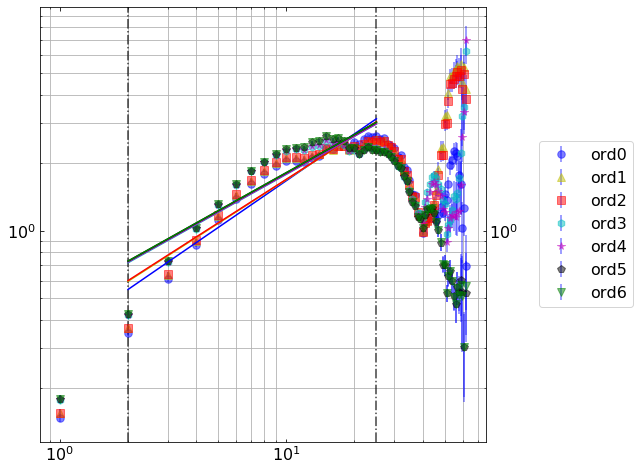

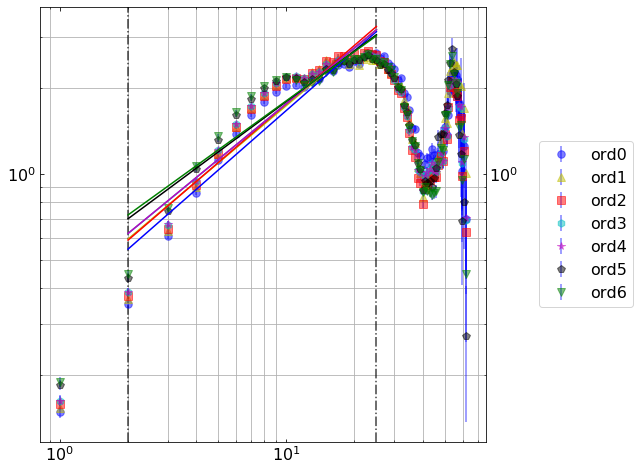

In [19]:
pltdata(SFn1,SFN1Pr,xi,xf,n)
pltdata(SFn2,SFN2Pr,xi,xf,n)

Weighted Structure Function

In [20]:
SFw1=dict()

for i in range(n):
    SFw1[i]=sosfw(argo1[i])

SFw2=dict()

for i in range(n):
    SFw2[i]=sosfw(argo2[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1171: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1180: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [21]:
#xi=1
#xf=8

#SFW1Data=dict()
#SFW1Pr=dict()


#for i in range(n):
#    SFW1Data[i],SFW1Pr[i]=LR(SFw1[i]['Lag'],SFw1[i]['Nmqvd'],SFw1[i]['ErrY'],xi,xf,n)
    
#SFW2Data=dict()
#SFW2Pr=dict()


#for i in range(n):
#    SFW2Data[i],SFW2Pr[i]=LR(SFw2[i]['Lag'],SFw2[i]['Nmqvd'],SFw2[i]['ErrY'],xi,xf,n)

In [22]:
#SFW1Data,SFW2Data

In [23]:
#pltdata(SFw1,SFW1Pr,xi,xf,n)
#pltdata(SFw2,SFW2Pr,xi,xf,n)

Weighted Property

In [24]:
SFwII1=dict()

for i in range(n):
    SFwII1[i]=sosfw2(argo1[i])
    
SFwII2=dict()

for i in range(n):
    SFwII2[i]=sosfw2(argo1[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1651: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1660: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f


In [25]:
xi=1
xf=10

SFWII1Data=dict()
SFWII1Pr=dict()

for i in range(n):
    SFWII1Data[i],SFWII1Pr[i]=LR(SFwII1[i]['Lag'],SFwII1[i]['Nmqvd'],SFwII1[i]['ErrY'],xi,xf,n)
    
SFWII2Data=dict()
SFWII2Pr=dict()

for i in range(n):
    SFWII2Data[i],SFWII2Pr[i]=LR(SFwII2[i]['Lag'],SFwII2[i]['Nmqvd'],SFwII2[i]['ErrY'],xi,xf,n)

In [26]:
SFWII1Data,SFWII2Data

({0:              R       eps     alpha  lags
  Value  0.93756  0.340107  0.875242   2.0
  Err    0.00003  0.004611  0.004627  10.0,
  1:               R       eps     alpha  lags
  Value  0.927698  0.375631  0.851002   2.0
  Err    0.000134  0.005047  0.004568  10.0,
  2:               R       eps     alpha  lags
  Value  0.928251  0.375242  0.852353   2.0
  Err    0.000132  0.005042  0.004572  10.0,
  3:               R       eps     alpha  lags
  Value  0.914512  0.409153  0.823319   2.0
  Err    0.000278  0.005681  0.004773  10.0,
  4:               R       eps     alpha  lags
  Value  0.913840  0.414618  0.821274   2.0
  Err    0.000273  0.005694  0.004726  10.0,
  5:               R       eps     alpha  lags
  Value  0.913673  0.415443  0.816856   2.0
  Err    0.000281  0.005719  0.004739  10.0,
  6:               R       eps     alpha  lags
  Value  0.913647  0.415512  0.816629   2.0
  Err    0.000282  0.005720  0.004738  10.0},
 {0:              R       eps     alpha  lags
  Va

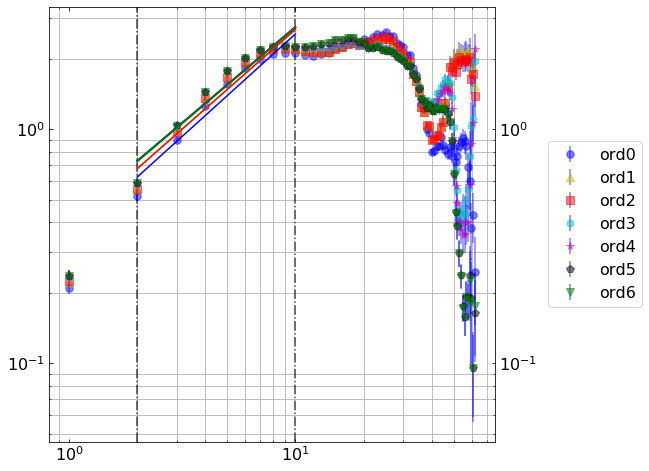

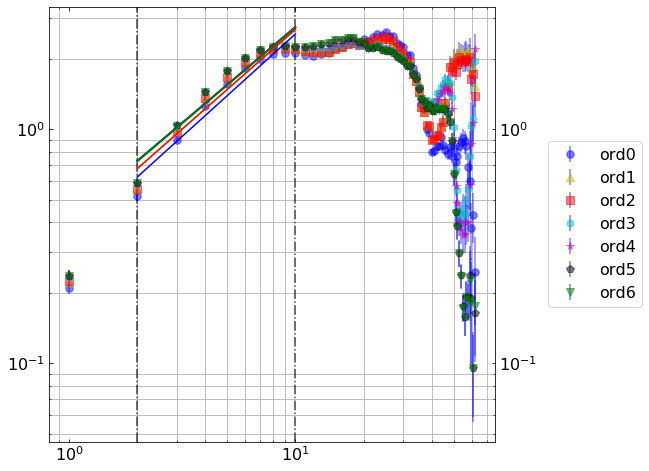

In [27]:
pltdata(SFwII1,SFWII1Pr,xi,xf,n)
pltdata(SFwII2,SFWII2Pr,xi,xf,n)

Structure Function Dr. Will

In [28]:
SFwh1=dict()

for i in range(n):
    SFwh1[i]=sfwh(argo1[i])
    
SFwh2=dict()

for i in range(n):
    SFwh2[i]=sfwh(argo2[i])

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [29]:
xi=1
xf=45

SFwh1Data=dict()
SFwh1Pr=dict()

for i in range(n):
    SFwh1Data[i],SFwh1Pr[i]=LR(SFwh1[i]['Lag'],SFwh1[i]['Nmqvd'],SFwh1[i]['ErrY'],xi,xf,n)
    
SFwh2Data=dict()
SFwh2Pr=dict()

for i in range(n):
    SFwh2Data[i],SFwh2Pr[i]=LR(SFwh2[i]['Lag'],SFwh2[i]['Nmqvd'],SFwh2[i]['ErrY'],xi,xf,n)

In [30]:
SFwh1Data,SFwh2Data

({0:               R        eps     alpha   lags
  Value  0.873068  10.571420  0.893034  1.405
  Err    0.000778   0.222493  0.002083  6.884,
  1:               R        eps     alpha   lags
  Value  0.881996  10.315682  0.896112  1.405
  Err    0.000805   0.211096  0.001684  6.884,
  2:               R        eps     alpha   lags
  Value  0.883437  10.260314  0.906537  1.405
  Err    0.000782   0.210811  0.001725  6.884,
  3:               R       eps     alpha   lags
  Value  0.889424  9.988790  0.844106  1.405
  Err    0.000972  0.192623  0.001277  6.884,
  4:               R        eps     alpha   lags
  Value  0.882091  10.220577  0.819789  1.405
  Err    0.001019   0.194411  0.001134  6.884,
  5:               R       eps     alpha   lags
  Value  0.883044  9.816878  0.819697  1.405
  Err    0.000868  0.187792  0.001301  6.884,
  6:               R       eps     alpha   lags
  Value  0.883073  9.812891  0.819823  1.405
  Err    0.000868  0.187751  0.001304  6.884},
 {0:          

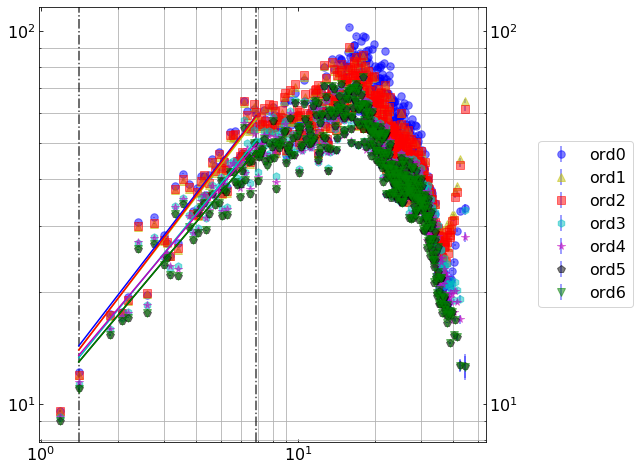

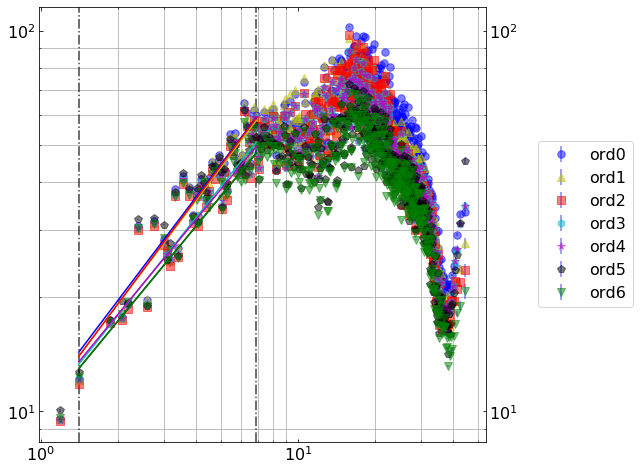

In [31]:
pltdata(SFwh1,SFwh1Pr,xi,xf,n)
pltdata(SFwh2,SFwh1Pr,xi,xf,n)

Autocorrelation Function

In [32]:
AF1=dict()

for i in range(n):
    AF1[i]=acf(argo1[i])
    
AF2=dict()

for i in range(n):
    AF2[i]=acf(argo2[i])

In [33]:
AF1Data=dict()
AF1Inter=dict()


for i in range(n):

    AF1Data[i],AF1Inter[i]=ACLR(AF1[i])
    
AF2Data=dict()
AF2Inter=dict()


for i in range(n):

    AF2Data[i],AF2Inter[i]=ACLR(AF2[i])
    

AF1Data,AF2Data 

({0: array([15.71466086, 42.02801076]),
  1: array([12.74520626, 39.13242921, 53.69411284]),
  2: array([12.7772378 , 39.20579492, 53.89053229]),
  3: array([11.75832061, 25.79334382, 30.36104005, 39.97452934]),
  4: array([11.66820655, 25.23043122, 30.94695149, 40.09442468]),
  5: array([11.76026507, 24.92774785, 31.76684006, 40.97155103]),
  6: array([11.76314064, 24.93451735, 31.76326058, 40.96545198])},
 {0: array([15.71466086, 42.02801076]),
  1: array([12.76032801, 40.0533512 ]),
  2: array([13.49879471, 37.95022956, 53.32436746]),
  3: array([13.01503449, 38.10276935]),
  4: array([13.00843087, 38.09963383]),
  5: array([12.73546648, 38.32939855, 52.63323238]),
  6: array([12.73185467, 37.94105117, 52.61565626])})

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


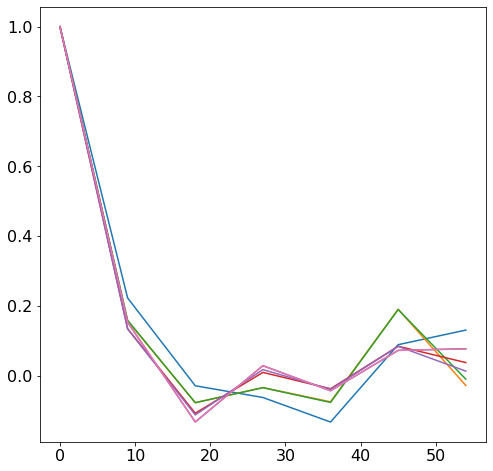

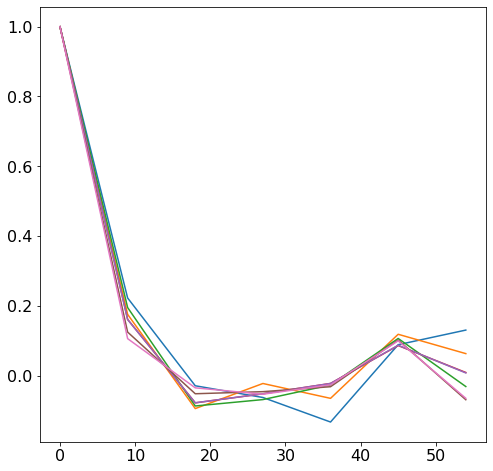

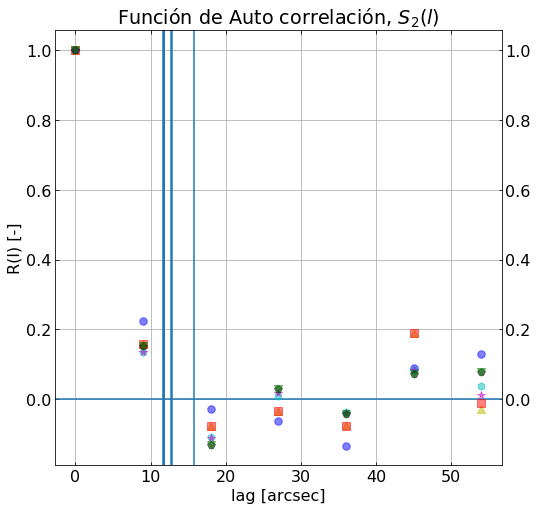

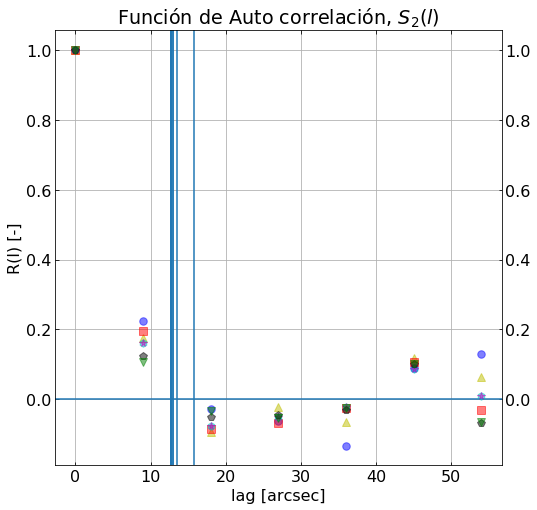

In [34]:
fig, ax=plt.subplots(figsize=(8,8))

for i in range(n):
    plt.plot(AF1[i]['Lag'],AF1[i]['Nmqvd'])

fig, ax=plt.subplots(figsize=(8,8))
    
for i in range(n):
    plt.plot(AF2[i]['Lag'],AF2[i]['Nmqvd'])
    
marker=itertools.cycle(('o','^','s','h','*','p','v'))
color=itertools.cycle(('b','y','r','c','m','k','g'))

fig, ax=plt.subplots(figsize=(8,8))

for i in range(n):
    ax.errorbar(AF1Inter[i][0],AF1Inter[i][1],fmt=next(marker),color=next(color), ecolor='b', alpha=0.5, markersize=7.5, label='ord' + str(i))

ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
plt.title('Función de Auto correlación, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.grid()
plt.axhline(y=0)

for y in range(n):
    for i in range(1):
        plt.axvline(x=AF1Data[y][i])



marker=itertools.cycle(('o','^','s','h','*','p','v'))
color=itertools.cycle(('b','y','r','c','m','k','g'))

fig, ax=plt.subplots(figsize=(8,8))

for i in range(n):
    ax.errorbar(AF2Inter[i][0],AF2Inter[i][1],fmt=next(marker),color=next(color), ecolor='b', alpha=0.5, markersize=7.5, label='ord' + str(i))

ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
plt.title('Función de Auto correlación, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.grid()
plt.axhline(y=0)

for y in range(n):
    for i in range(1):
        plt.axvline(x=AF2Data[y][i])

1DPSD

In [35]:
#PS1=dict()

#for i in range(n):
#    PS1[i]=ps(argo1[i])
    
#PS2=dict()

#for i in range(n):
#    PS2[i]=ps(argo2[i])

In [36]:
#PS1[0]

In [37]:
#xi=10
#xf=29

#PS1Data=dict()
#mx=len(PS1[i]['k'])
#PS1Pr=dict()

#for i in range(n):
#    PS1Data[i],PS1Pr[i]=LR(PS1[i]['k'][1:mx],PS1[i]['Pk'][1:mx],PS1[i]['Err'][1:mx],xi,xf,n)
    
#PS2Data=dict()
#PS2Pr=dict()

#for i in range(n):
#    PS2Data[i],PS2Pr[i]=LR(PS2[i]['k'][1:mx],PS2[i]['Pk'][1:mx],PS2[i]['Err'][1:mx],xi,xf,n)

In [38]:
#PS1Data,PS2Data

In [39]:
#pltdata(PS1,PS1Pr,xi+1,xf,n)
#pltdata(PS2,PS2Pr,xi+1,xf,n)

In [40]:
#PS1k=dict()

#for i in range(n):
#    PS1k[i]=psk(argo1[i])
    
#PS2k=dict()

#for i in range(n):
#    PS2k[i]=psk(argo2[i])

In [41]:
#PS1k[0]

In [42]:
#xi=5
#xf=10

#PS1kData=dict()
#mx=len(PS1k[0]['k'])
#PS1kPr=dict()


#for i in range(n):
#    PS1kData[i],PS1kPr[i]=LR(PS1k[i]['k'][1:mx],PS1k[i]['Pk'][1:mx],PS1k[i]['Err'][1:mx],xi,xf,n)
    
#PS2kData=dict()
#PS2kPr=dict()

#for i in range(n):
#    PS2kData[i],PS2kPr[i]=LR(PS2k[i]['k'][1:mx],PS2k[i]['Pk'][1:mx],PS2k[i]['Err'][1:mx],xi,xf,n)

In [43]:
#PS1kData,PS2kData

In [44]:
#pltdata(PS1k,PS1kPr,xi,xf+1,n)
#pltdata(PS2k,PS1kPr,xi,xf+1,n)

1DPSD Turbustat

In [45]:
PST1a=dict()
PST1b=dict()


for i in range(n):
    PST1a[i],PST1b[i]=pst(argo1[i])
    
PST2a=dict()
PST2b=dict()

for i in range(n):
    PST2a[i],PST1b[i]=pst(argo2[i])

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/b

In [46]:
for i in range(n):
    print(PST1a[i].slope2D,PST1a[i].slope2D_err)
    


-2.4360621879864204 0.06059594160044535
-2.3864562936993305 0.06251608878861603
-2.388651845950493 0.04896795499076223
-2.4478855584290287 0.05891673019520849
-2.4529077549967955 0.05264729526128975
-2.519268994219378 0.05467797467243596
-2.5185798312510927 0.05298898370650629


In [47]:
for i in range(n):
    print(PST2a[i].slope2D,PST2a[i].slope2D_err)

-2.4360621879864204 0.05985123165014272
-2.4785834185506728 0.057508601544457694
-2.476653880345512 0.0644813850962811
-2.454144087255408 0.0510097729875727
-2.4546020945340628 0.05293115339321375
-2.4634620405183867 0.06278299452640668
-2.4374381392250473 0.061960885572476476


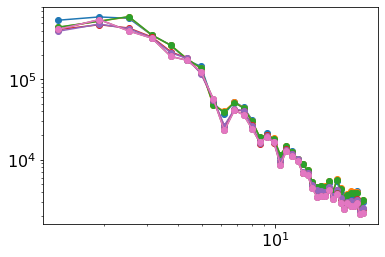

In [48]:
for i in range(n):
    plt.loglog(PST1a[i].wavenumbers,PST1a[i].ps1D,'o-', label=str(i))
    #plt.legend()

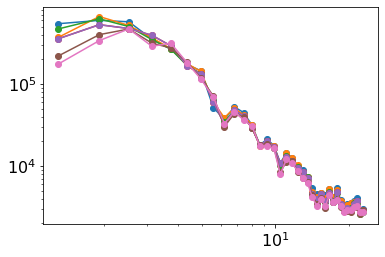

In [49]:
for i in range(n):
    plt.loglog(PST2a[i].wavenumbers,PST2a[i].ps1D,'o-', label=str(i))
    #plt.legend()

In [50]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 547.4185745716095 seconds ---


In [51]:
#SF1

In [52]:
#SF1.to_csv('SF1.csv')